# EJERCICIOS

In [83]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet,LogisticRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, root_mean_squared_error, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [84]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

In [ ]:
#El modelo esta sobreajustado, es decir el polinomio tiene un grado demasiado alto. Tres formas de arreglarlo serian:
# 1. Reducir el grado del polinomio. Esto reduce la complejidad del modelo y ayuda a evitar que se sobreajuste a los 
# datos de entrenamiento.
# 2. Aumentar la cantidad de datos. Esto permite que el modelo generalice mejor porque tiene más ejemplos para 
# aprender patrones reales en lugar de ruidos.
# 3. Aplicar regularización. Ayuda a limitar la complejidad del modelo penalizando los coeficientes más grandes 
# del polinomio.

## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

In [ ]:
# El error de entrenamiento y el error de validación son casi iguales y bastante altos, esto indica que el 
# modelo está subajustando. Deberías reducir α para permitir que el modelo se ajuste mejor a los datos.

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [86]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

Muestra los primero datos de X e y

In [87]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [88]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Usa .describe y .info para ver un poco de información

In [89]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Representa cada una de la características

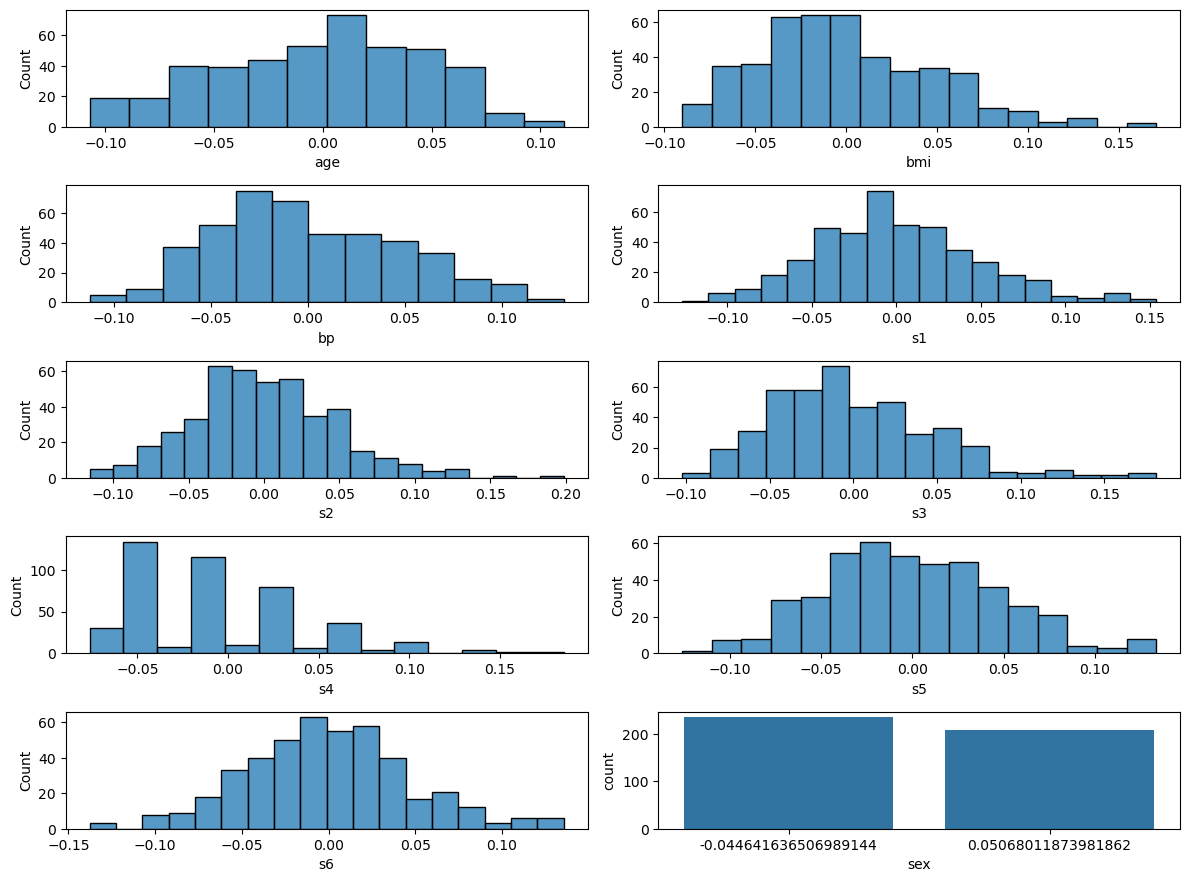

In [91]:
df_object = X.select_dtypes(include=["object","category"]).columns.to_list()
df_num = X.select_dtypes(include=[np.number]).columns.to_list()

df_num.remove("sex")

df_object.append("sex")

plt.figure(figsize=(12,12))

subplot_index=1

for col in df_num:
    plt.subplot(7,2,subplot_index)
    sns.histplot(x=X[col])
    subplot_index+=1

for col in df_object:
    plt.subplot(7,2,subplot_index)
    sns.countplot(x=X[col])
    subplot_index+=1



plt.tight_layout()
plt.show()

Muestra la matriz de correlaciones

In [92]:
X_con=pd.concat([X , y], axis=1)
corr_matrix = X_con.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

In [93]:
corr_matrix.style.background_gradient()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


#### DIVIDIR LOS DATOS

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [95]:
scaler=StandardScaler()

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [96]:
# Modelos a evaluar
models = {
    "Regresión lineal": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=5000, tol=1e-5, n_iter_no_change=100, penalty=None, eta0=0.01, random_state=42),
    "LinearSVR": LinearSVR(epsilon=0.5, random_state=42),
    "Arbol de decision":DecisionTreeRegressor(max_depth=2, random_state=42),
    "Ridge":Ridge(alpha=1.0),
    "Lasso":Lasso(alpha=0.1),
}

scaler = StandardScaler()

# Evaluar cada modelo
for name, algoritmo in models.items():

    # Crear el pipeline
    modelo = make_pipeline(scaler, algoritmo)

   # Validación cruzada con error cuadrático medio negativo
    rmse_scores = -cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    
    # Calcular métricas promedio
    mean_rmse = np.mean(rmse_scores)
   
    print(f"Modelo: {name}")
    print(f"RMSE promedio: {mean_rmse:.4f}")
    print("-" * 40)

Modelo: Regresión lineal
RMSE promedio: 55.9721
----------------------------------------
Modelo: SGDRegressor
RMSE promedio: 55.9507
----------------------------------------
Modelo: LinearSVR
RMSE promedio: 67.5175
----------------------------------------
Modelo: Arbol de decision
RMSE promedio: 61.2638
----------------------------------------
Modelo: Ridge
RMSE promedio: 55.9165
----------------------------------------
Modelo: Lasso
RMSE promedio: 55.9190
----------------------------------------


Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [97]:
y_min=np.min(y)
y_max=np.max(y)
print("Y min:",y_min)
print("Y max:",y_max)

Y min: 25.0
Y max: 346.0


### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamos a aplicar búsqueda exhaustiva para el parámetro alpha.

In [98]:
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]  
}

pipeline=make_pipeline(StandardScaler(), Ridge(random_state=42))

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
print(f"Mejor valor de alpha: {grid_search.best_params_['ridge__alpha']}")


Mejor valor de alpha: 10


Evalúa este mejor modelo en el conjunto de pruebas

In [99]:
best_model = grid_search.best_estimator_

# Evaluar el modelo con el conjunto de prueba
final_predictions=best_model.predict(X_test)

print(f"RMSE: {root_mean_squared_error(y_test,final_predictions)}")

RMSE: 53.626287568895194


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [100]:
joblib.dump(best_model, "diabetes.pkl")

['diabetes.pkl']

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [101]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

In [102]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Representa la matriz de correlaciones

In [105]:
X_con=pd.concat([X , y], axis=1)
corr_matrix = X_con.corr(numeric_only=True)
corr_matrix['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [106]:
corr_matrix.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


#### DIVIDIR LOS DATOS

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [108]:
model=LogisticRegression(random_state=42)

preprocessing=StandardScaler()
modelo = make_pipeline(preprocessing, model)

predic=cross_val_predict(modelo, X_train, y_train, cv=10)



Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

In [109]:
print("Regresión logistica")
#Matriz de confusion
cm = confusion_matrix(y_train, predic)
print(f"Matriz de confusion:")
print(cm)

#Exactitud
print(f"Exactitud: {accuracy_score(y_train, predic)}")

#Precision
print(f"Precision: {precision_score(y_train, predic, average='macro')}")

#Sensibilidad
print(f"Sensibilidad: {recall_score(y_train, predic, average='macro')}")

#F1
print(f"F1: {f1_score(y_train, predic, average='macro')}")

Regresión logistica
Matriz de confusion:
[[40  0  0]
 [ 0 37  4]
 [ 0  4 35]]
Exactitud: 0.9333333333333333
Precision: 0.9332916406087137
Sensibilidad: 0.9332916406087137
F1: 0.9332916406087137


¿Qué podemos deducir?

In [110]:
#Podemos deducir que el modelo tiene un buen desempeño ya que la exactitud es muy alta, lo que significa que acierta
# casi todas las veces. La precisión y sensibilidad también son bastante altas, 
# lo que sugiere que el modelo no solo es bueno para hacer predicciones generales, 
# sino también para identificar correctamente las clases sin generar muchos falsos positivos o negativos.

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [111]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']  
}

log_reg=make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000))

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha
print(f"Mejores valores: {grid_search.best_params_}")

final_model=grid_search.best_estimator_

Mejores valores: {'logisticregression__C': 1, 'logisticregression__solver': 'lbfgs'}


### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

In [112]:
final_predictions=final_model.predict(X_test)

#Exactitud
print(f"Exactitud: {accuracy_score(y_test, final_predictions)}")

#Matriz de confusion
cm = confusion_matrix(y_test, final_predictions)
print(f"Matriz de confusion:")
print(cm)

#Precision
print(f"Precision: {precision_score(y_test, final_predictions, average='macro')}")

#Sensibilidad
print(f"Sensibilidad: {recall_score(y_test, final_predictions, average='macro')}")

#F1
print(f"F1: {f1_score(y_test, final_predictions, average='macro')}")



Exactitud: 1.0
Matriz de confusion:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Precision: 1.0
Sensibilidad: 1.0
F1: 1.0


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [113]:
joblib.dump(final_model, "flores.pkl")

['flores.pkl']

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

#### OBTENER LOS DATOS

In [140]:
df_co2=pd.read_csv("datos/co2.csv")

#### EXPLORAR LOS DATOS

In [141]:
df_co2.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [142]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


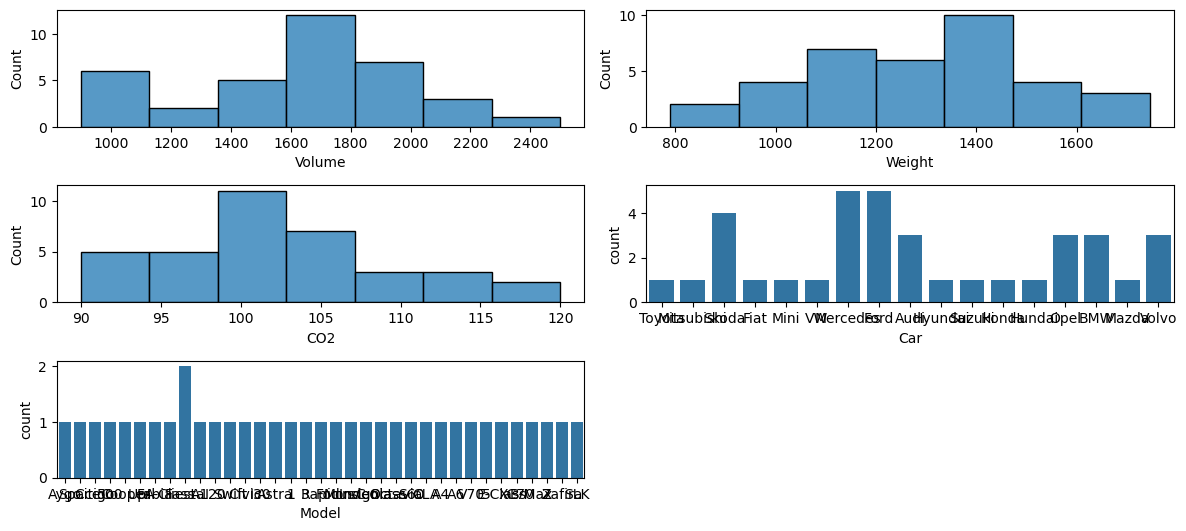

In [143]:
df_object = df_co2.select_dtypes(include=["object","category"]).columns.to_list()
df_num = df_co2.select_dtypes(include=[np.number]).columns.to_list()

plt.figure(figsize=(12,12))

subplot_index=1

for col in df_num:
    plt.subplot(7,2,subplot_index)
    sns.histplot(x=df_co2[col])
    subplot_index+=1

for col in df_object:
    plt.subplot(7,2,subplot_index)
    sns.countplot(x=df_co2[col])
    subplot_index+=1



plt.tight_layout()
plt.show()

In [144]:
corr_matrix = df_co2.corr(numeric_only=True)
corr_matrix['CO2'].sort_values(ascending=False)

CO2       1.000000
Volume    0.592082
Weight    0.552150
Name: CO2, dtype: float64

In [145]:
corr_matrix.style.background_gradient()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


#### DIVIDIR LOS DATOS

In [146]:
#Quitamos la columnas de la y, tambien eliminamos las columnas car y model ya que estas no nos aportan nada al modelo
X=df_co2.drop(['CO2','Model','Car'], axis=1)
y=df_co2['CO2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [154]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler())

preprocessing = ColumnTransformer([
    ("transform",num_pipeline,["Volume","Weight"]),
] , verbose_feature_names_out= False)



### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

In [159]:

# Modelos a evaluar
models = {
    "Regresión lineal": LinearRegression(),
    "SGDRegressor": SGDRegressor(max_iter=5000, tol=1e-5, n_iter_no_change=100, penalty=None, eta0=0.01, random_state=42),
    "LinearSVR": LinearSVR(epsilon=0.5, random_state=42, max_iter=10000, tol=1e-4),
    "Arbol de decision":DecisionTreeRegressor(max_depth=2, random_state=42),
    "Ridge":Ridge(alpha=1.0),
    "Lasso":Lasso(alpha=0.1),
}


# Evaluar cada modelo
for name, algoritmo in models.items():

    # Crear el pipeline
    modelo = make_pipeline(preprocessing, algoritmo)

   # Validación cruzada con error cuadrático medio negativo
    rmse_scores = -cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    
    # Calcular ### OPTIMIZACIÓN DEL MODELOmétricas promedio
    mean_rmse = np.mean(rmse_scores)
   
    print(f"Modelo: {name}")
    print(f"RMSE promedio: {mean_rmse:.4f}")
    print("-" * 40)

Modelo: Regresión lineal
RMSE promedio: 5.8407
----------------------------------------
Modelo: SGDRegressor
RMSE promedio: 5.8417
----------------------------------------
Modelo: LinearSVR
RMSE promedio: 78.6773
----------------------------------------
Modelo: Arbol de decision
RMSE promedio: 5.3764
----------------------------------------
Modelo: Ridge
RMSE promedio: 5.8029
----------------------------------------
Modelo: Lasso
RMSE promedio: 5.8421
----------------------------------------


In [149]:
y_min=np.min(y)
y_max=np.max(y)
print("Y min:",y_min)
print("Y max:",y_max)

Y min: 90
Y max: 120


### OPTIMIZACIÓN DEL MODELO

Seleccionamos DecisionTreeRegressor porque es el que menos RMSE tiene

In [160]:
param_grid = {
    'decisiontreeregressor__max_depth': [1, 2, 4, 6, 8, 10, None],  # Profundidad máxima del árbol
    'decisiontreeregressor__min_samples_split': [1, 2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
}

pipeline = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))


grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mostrar el mejor conjunto de hiperparámetros y su error
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'decisiontreeregressor__max_depth': 2, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}


In [151]:
best_model = grid_search.best_estimator_

# Evaluar el modelo con el conjunto de prueba
final_predictions=best_model.predict(X_test)

print(f"RMSE en test: {root_mean_squared_error(y_test,best_model.predict(X_test))}")
print(f"RMSE en train: {root_mean_squared_error(y_train,best_model.predict(X_train))}")

RMSE en test: 8.607786027803751
RMSE en train: 4.6669247984973925


Podemos ver que nuestro modelo es algo mejor que el de la prediccion y en el test algo peor. Si tenemos en cuenta que la varianza de los resultados buscados es de 30 y nuestro error de 8, este es bastante alto.

In [153]:
joblib.dump(best_model, "co2.pkl")

['co2.pkl']